In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('yield_df.csv')

In [4]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [114]:
df.tail()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,yield
28237,2013,657.0,2550.07,19.76,Zimbabwe,"Rice, paddy",22581.0
28238,2013,657.0,2550.07,19.76,Zimbabwe,Sorghum,3066.0
28239,2013,657.0,2550.07,19.76,Zimbabwe,Soybeans,13142.0
28240,2013,657.0,2550.07,19.76,Zimbabwe,Sweet potatoes,22222.0
28241,2013,657.0,2550.07,19.76,Zimbabwe,Wheat,22888.0


In [120]:
specific_rows = df[df['Area'] == "India"]
specific_rows

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,yield
10502,1990,1083.0,75000.0,25.58,India,Cassava,205381.0
10503,1990,1083.0,75000.0,26.88,India,Cassava,205381.0
10504,1990,1083.0,75000.0,25.79,India,Cassava,205381.0
10505,1990,1083.0,75000.0,24.10,India,Cassava,205381.0
10506,1990,1083.0,75000.0,25.25,India,Cassava,205381.0
...,...,...,...,...,...,...,...
14544,2013,1083.0,45620.0,25.85,India,Wheat,31538.0
14545,2013,1083.0,45620.0,27.14,India,Wheat,31538.0
14546,2013,1083.0,45620.0,25.98,India,Wheat,31538.0
14547,2013,1083.0,45620.0,27.44,India,Wheat,31538.0


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.shape

(28242, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [8]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [9]:
df.duplicated().sum()

2310

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

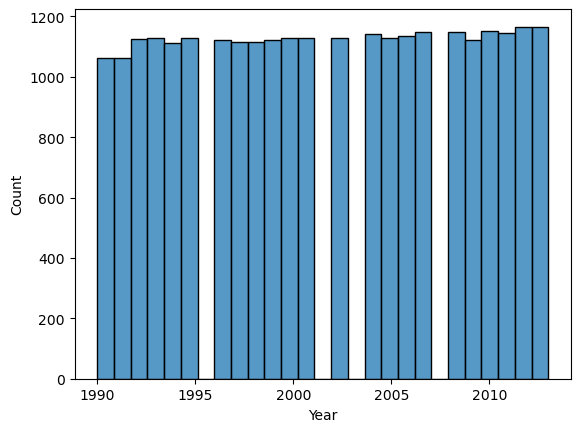

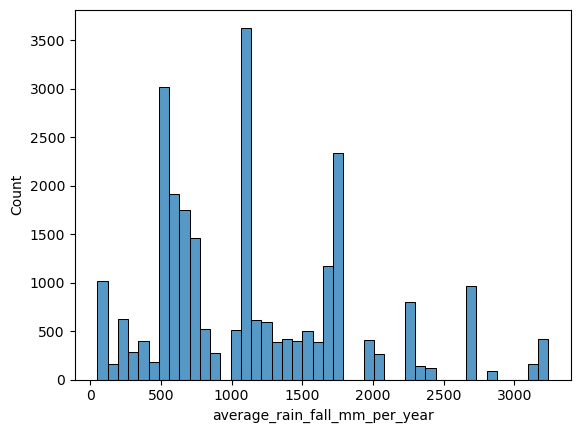

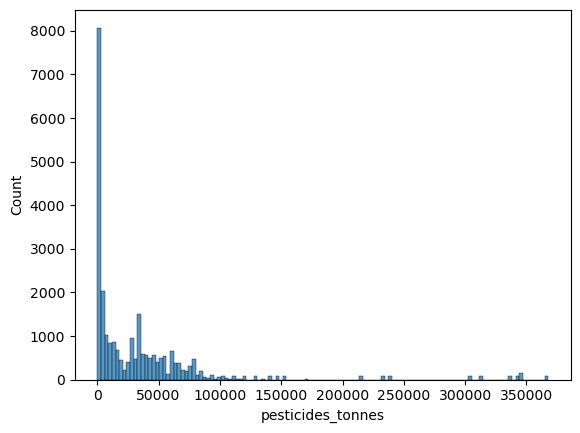

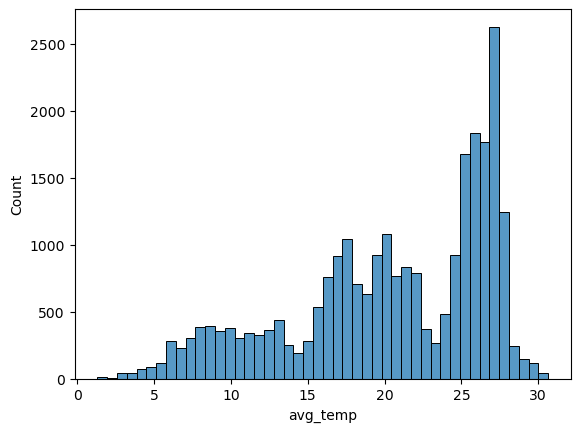

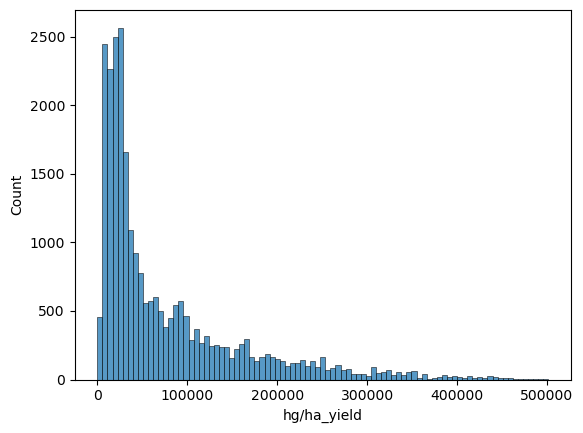

In [56]:
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i)
  plt.show()

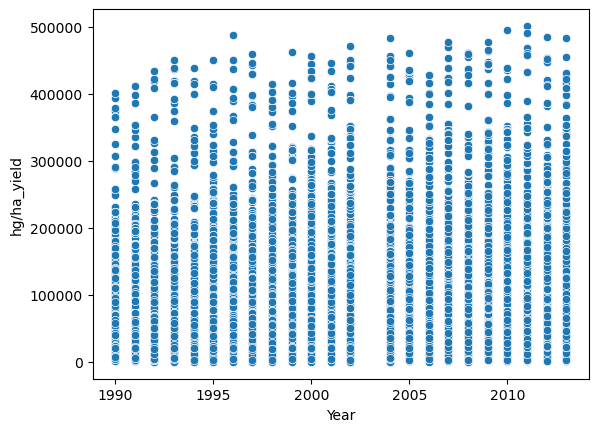

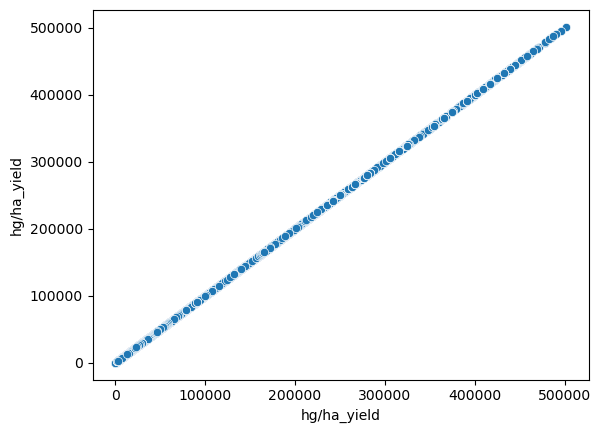

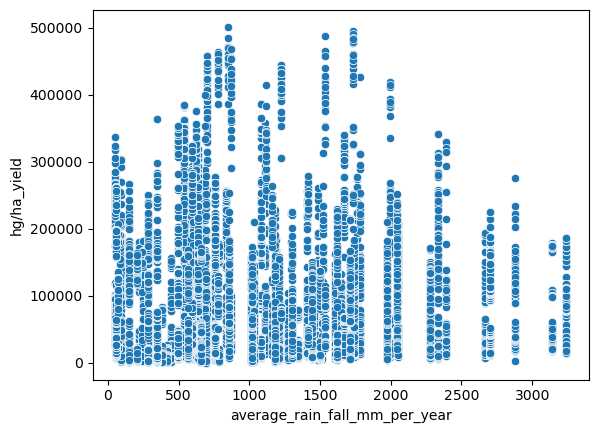

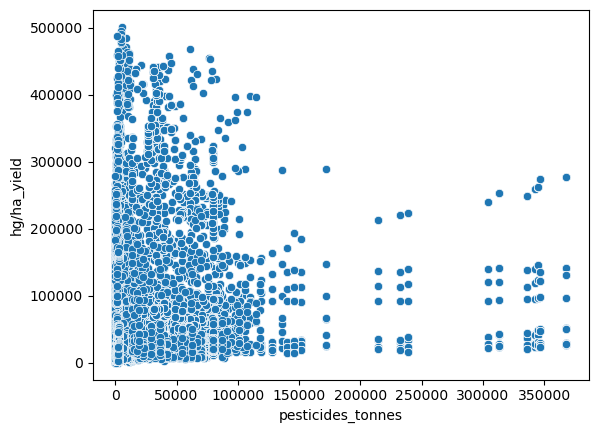

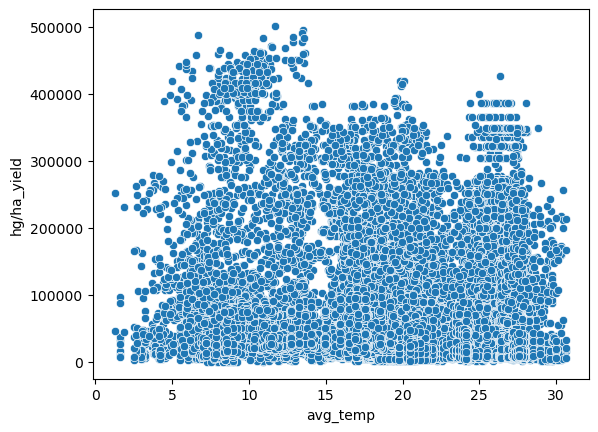

In [60]:
for i in ['Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp']:
  sns.scatterplot(data=df,x=i,y="hg/ha_yield")
  plt.show()
    

In [62]:
df['yield'] = df['hg/ha_yield']
df.drop('hg/ha_yield',axis=1,inplace=True)

In [64]:
df.head(2)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667


Text(0, 0.5, 'yield')

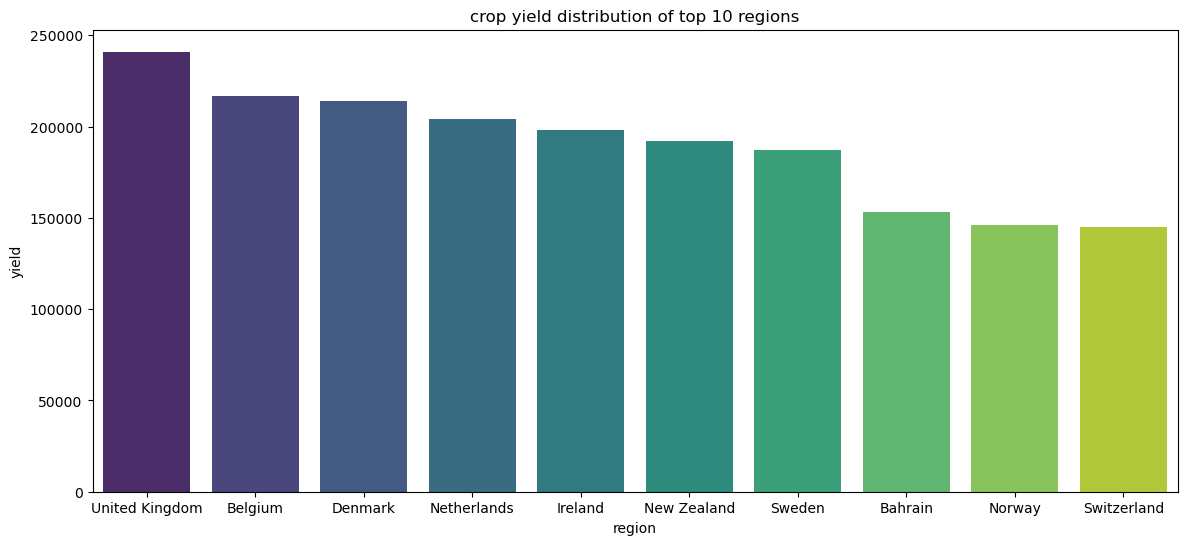

In [68]:
yield_top_10_region = df.groupby('Area')['yield'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(14,6))
sns.barplot(x=yield_top_10_region.index, y=yield_top_10_region.values,palette='viridis')
plt.title('crop yield distribution of top 10 regions')
plt.xlabel('region')
plt.ylabel('yield')

Text(0, 0.5, 'yield')

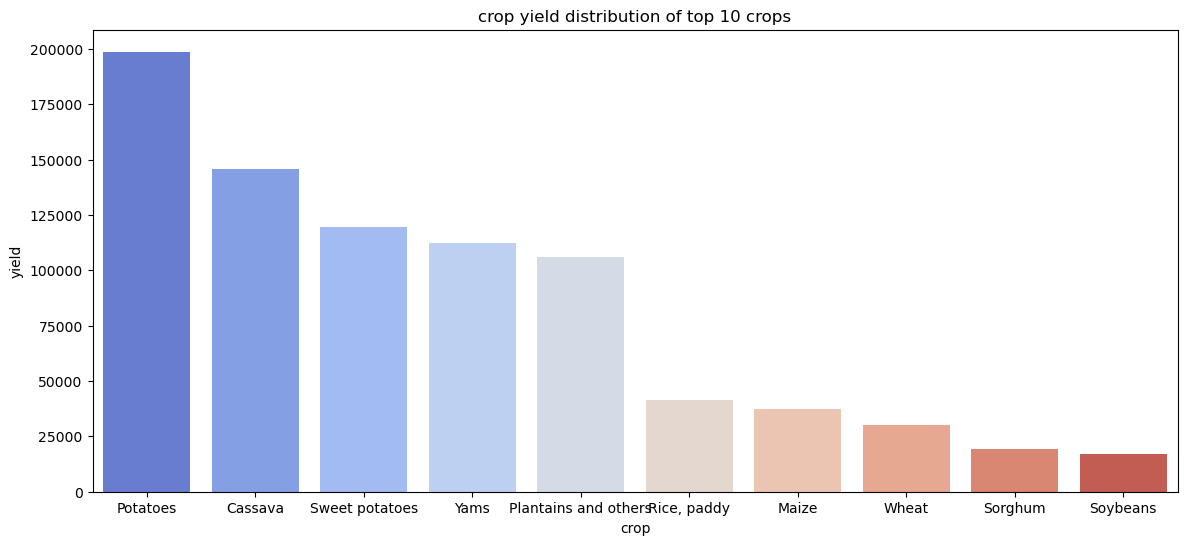

In [70]:
yield_top_10_crops = df.groupby('Item')['yield'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(14,6))
sns.barplot(x=yield_top_10_crops.index,y=yield_top_10_crops.values,palette='coolwarm')
plt.title('crop yield distribution of top 10 crops')
plt.xlabel('crop')
plt.ylabel('yield')

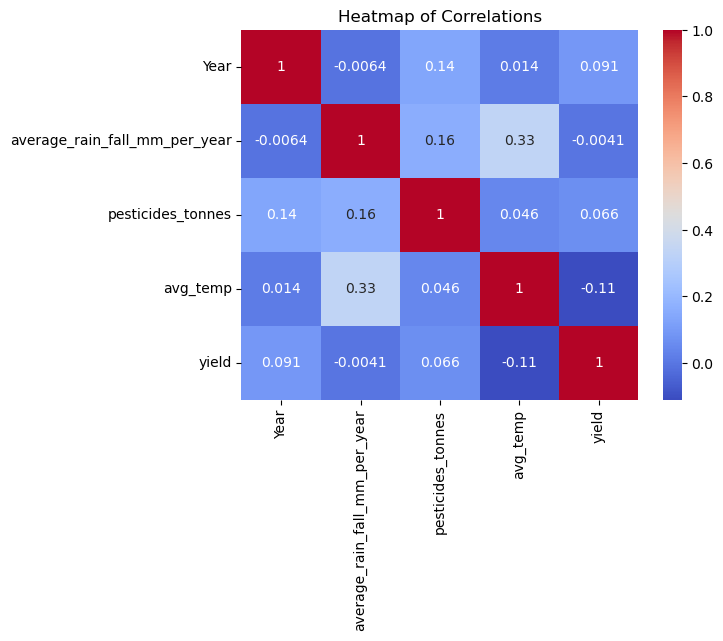

In [72]:
corr = df.corr(numeric_only = True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations')
plt.show()

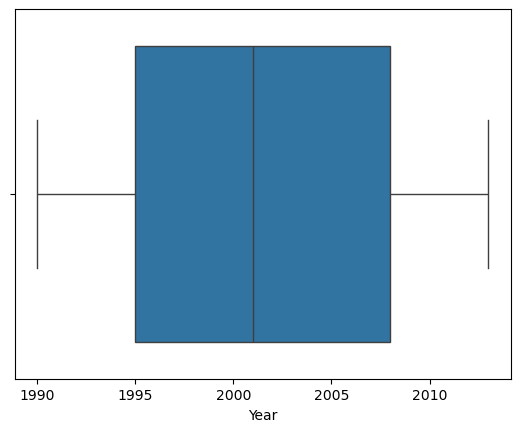

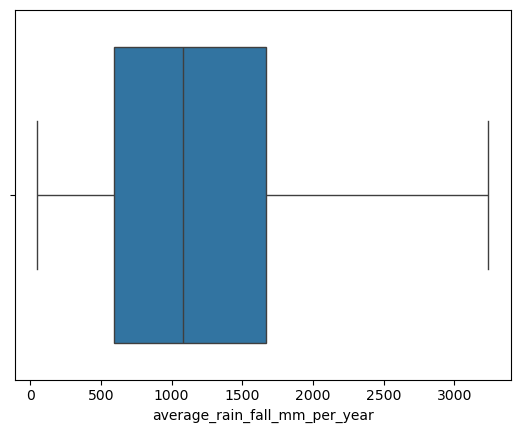

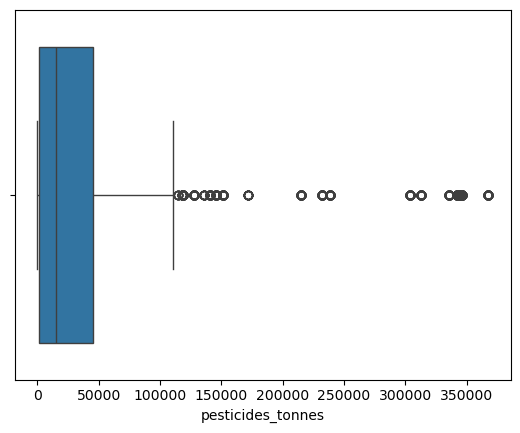

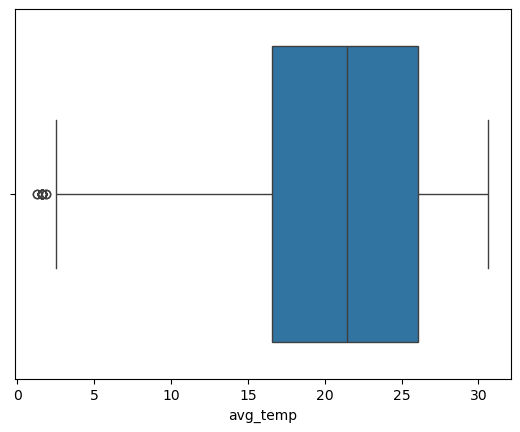

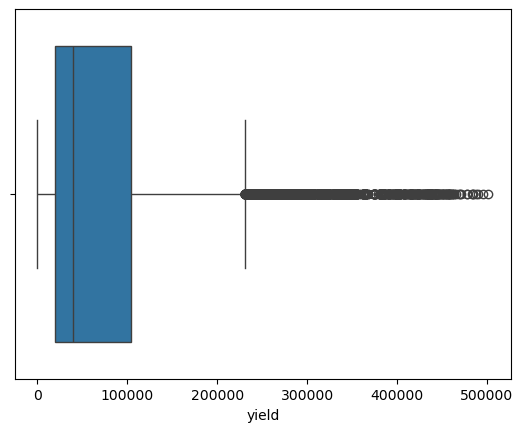

In [74]:
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

In [78]:
df.columns

Index(['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes',
       'avg_temp', 'Area', 'Item', 'yield'],
      dtype='object')

In [80]:
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [84]:
for i in ['pesticides_tonnes', 'avg_temp', 'yield']:
    lw,uw=wisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])

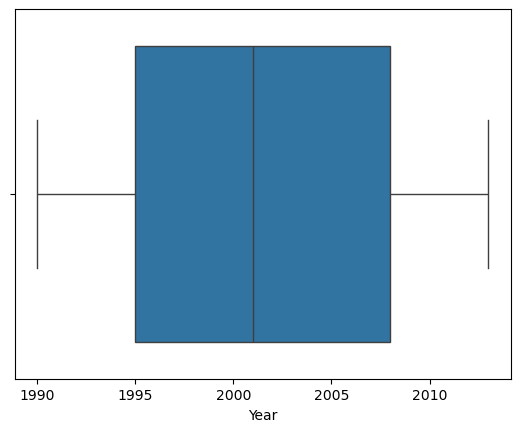

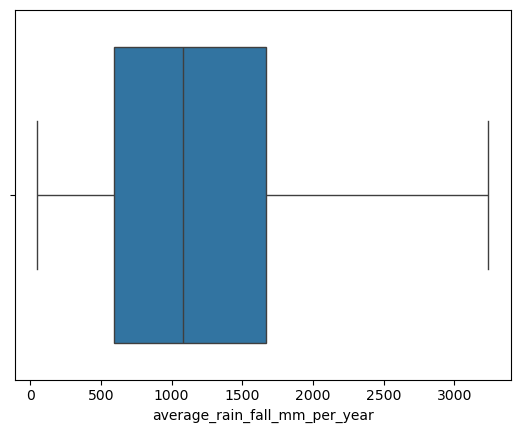

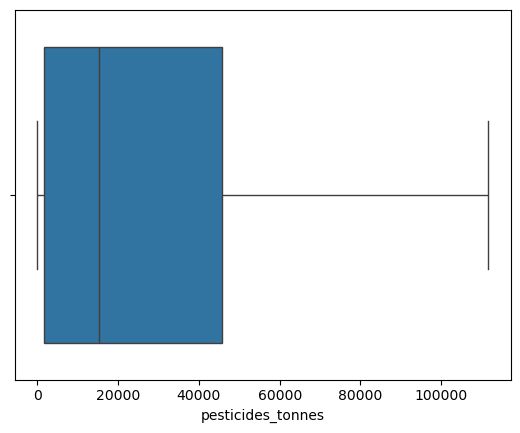

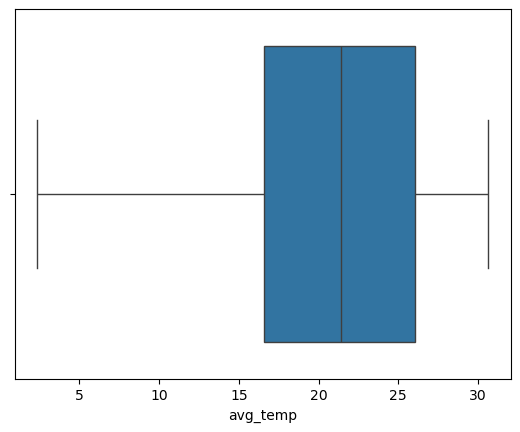

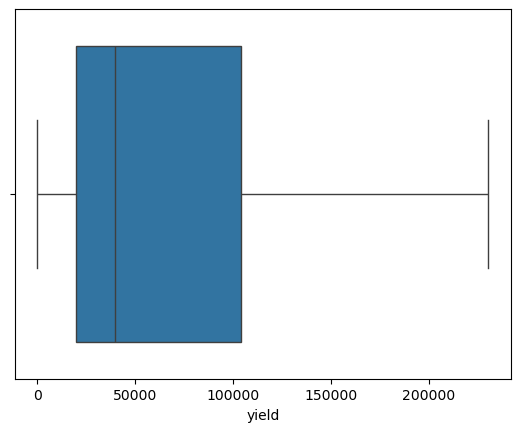

In [86]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

# Transforming average_rain_fall_mm_per_year
In summary, this code identifies the indices of rows in the DataFrame df where the values in the column 'average_rain_fall_mm_per_year' are not numeric strings. These rows can be considered for removal or further processing, depending on the specific use case.

In [13]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True
to_drop = df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [14]:
df = df.drop(to_drop)

In [15]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [16]:
df['average_rain_fall_mm_per_year'] = df['average_rain_fall_mm_per_year'].astype(np.float64)

In [18]:
len(df['Area'].unique())

101

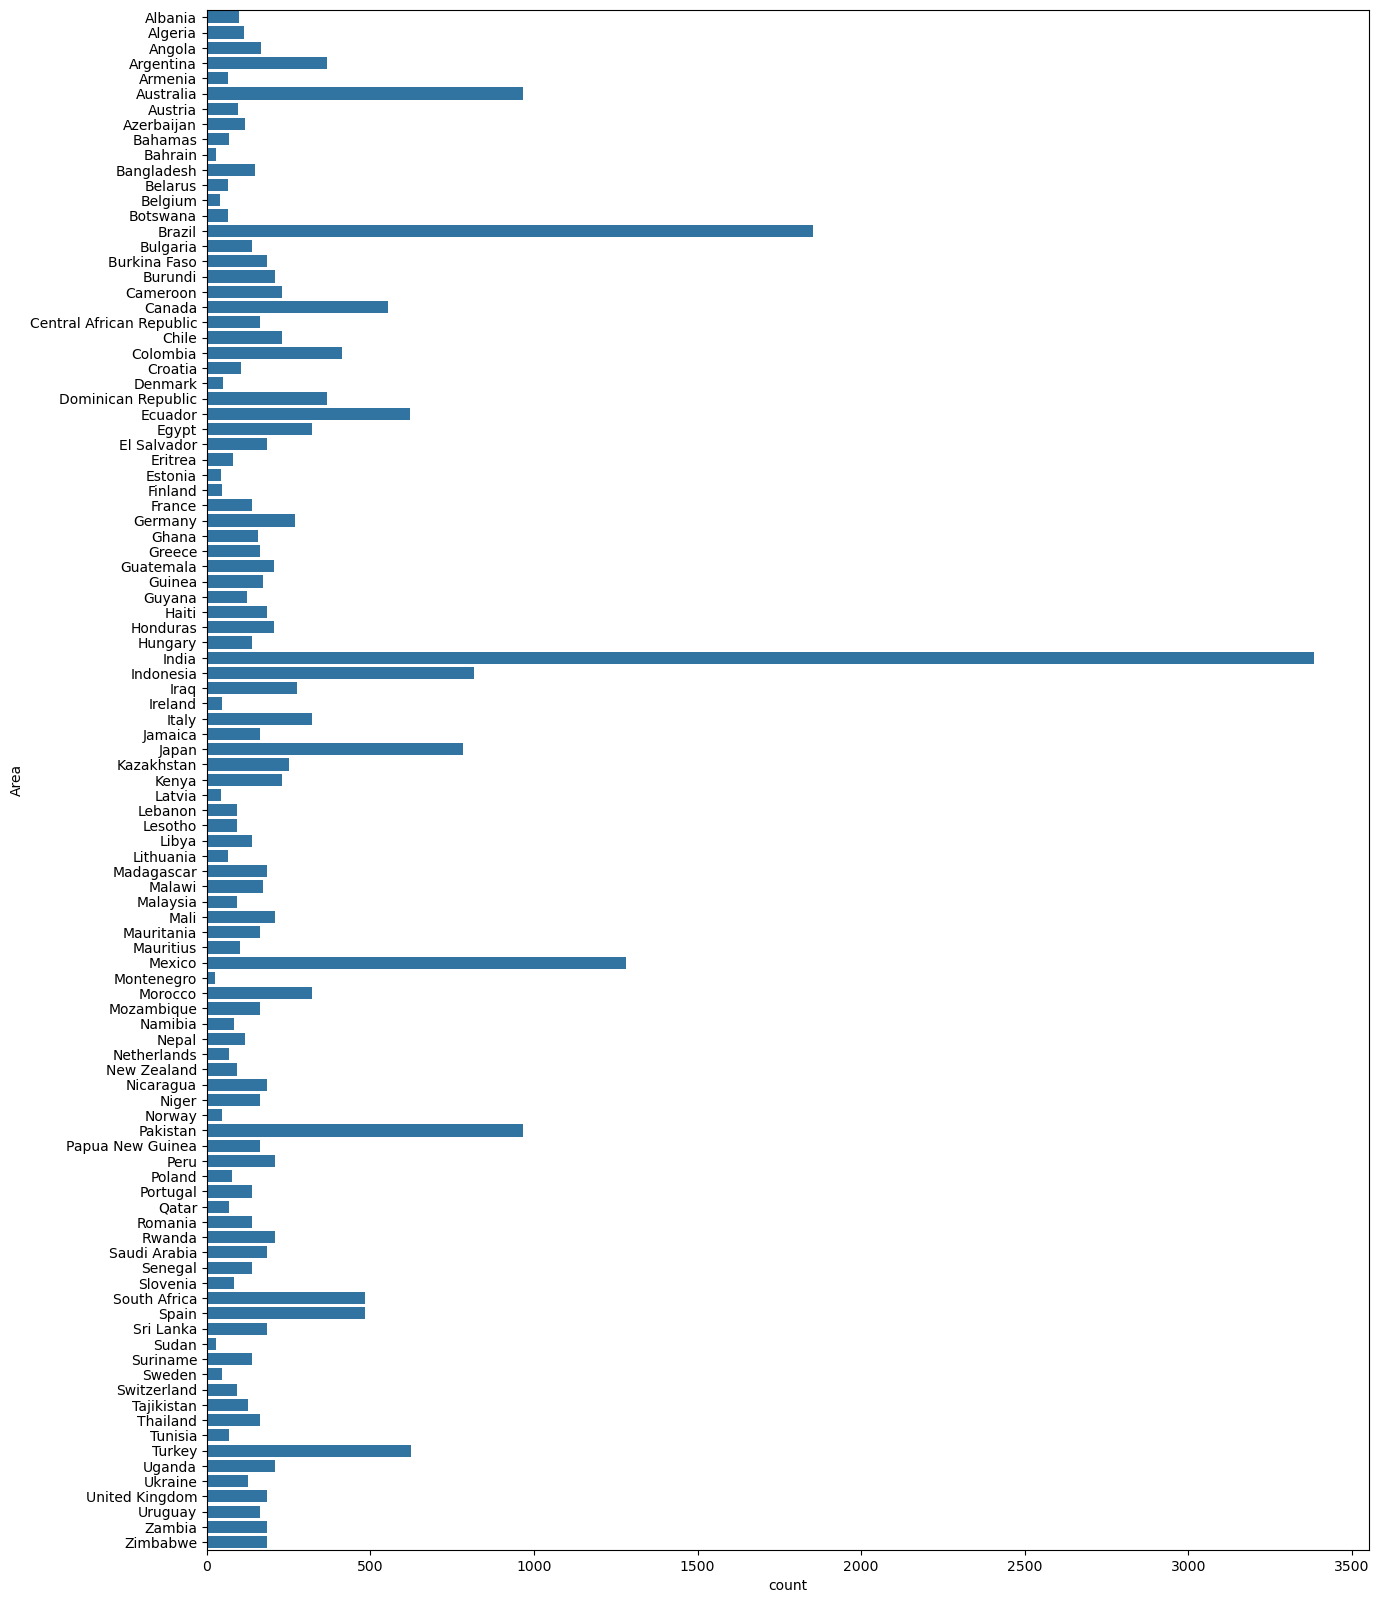

In [19]:
plt.figure(figsize=(15,20))
sns.countplot(y=df['Area'])
plt.show()

In [20]:
(df['Area'].value_counts() < 500).sum()

91

<Axes: >

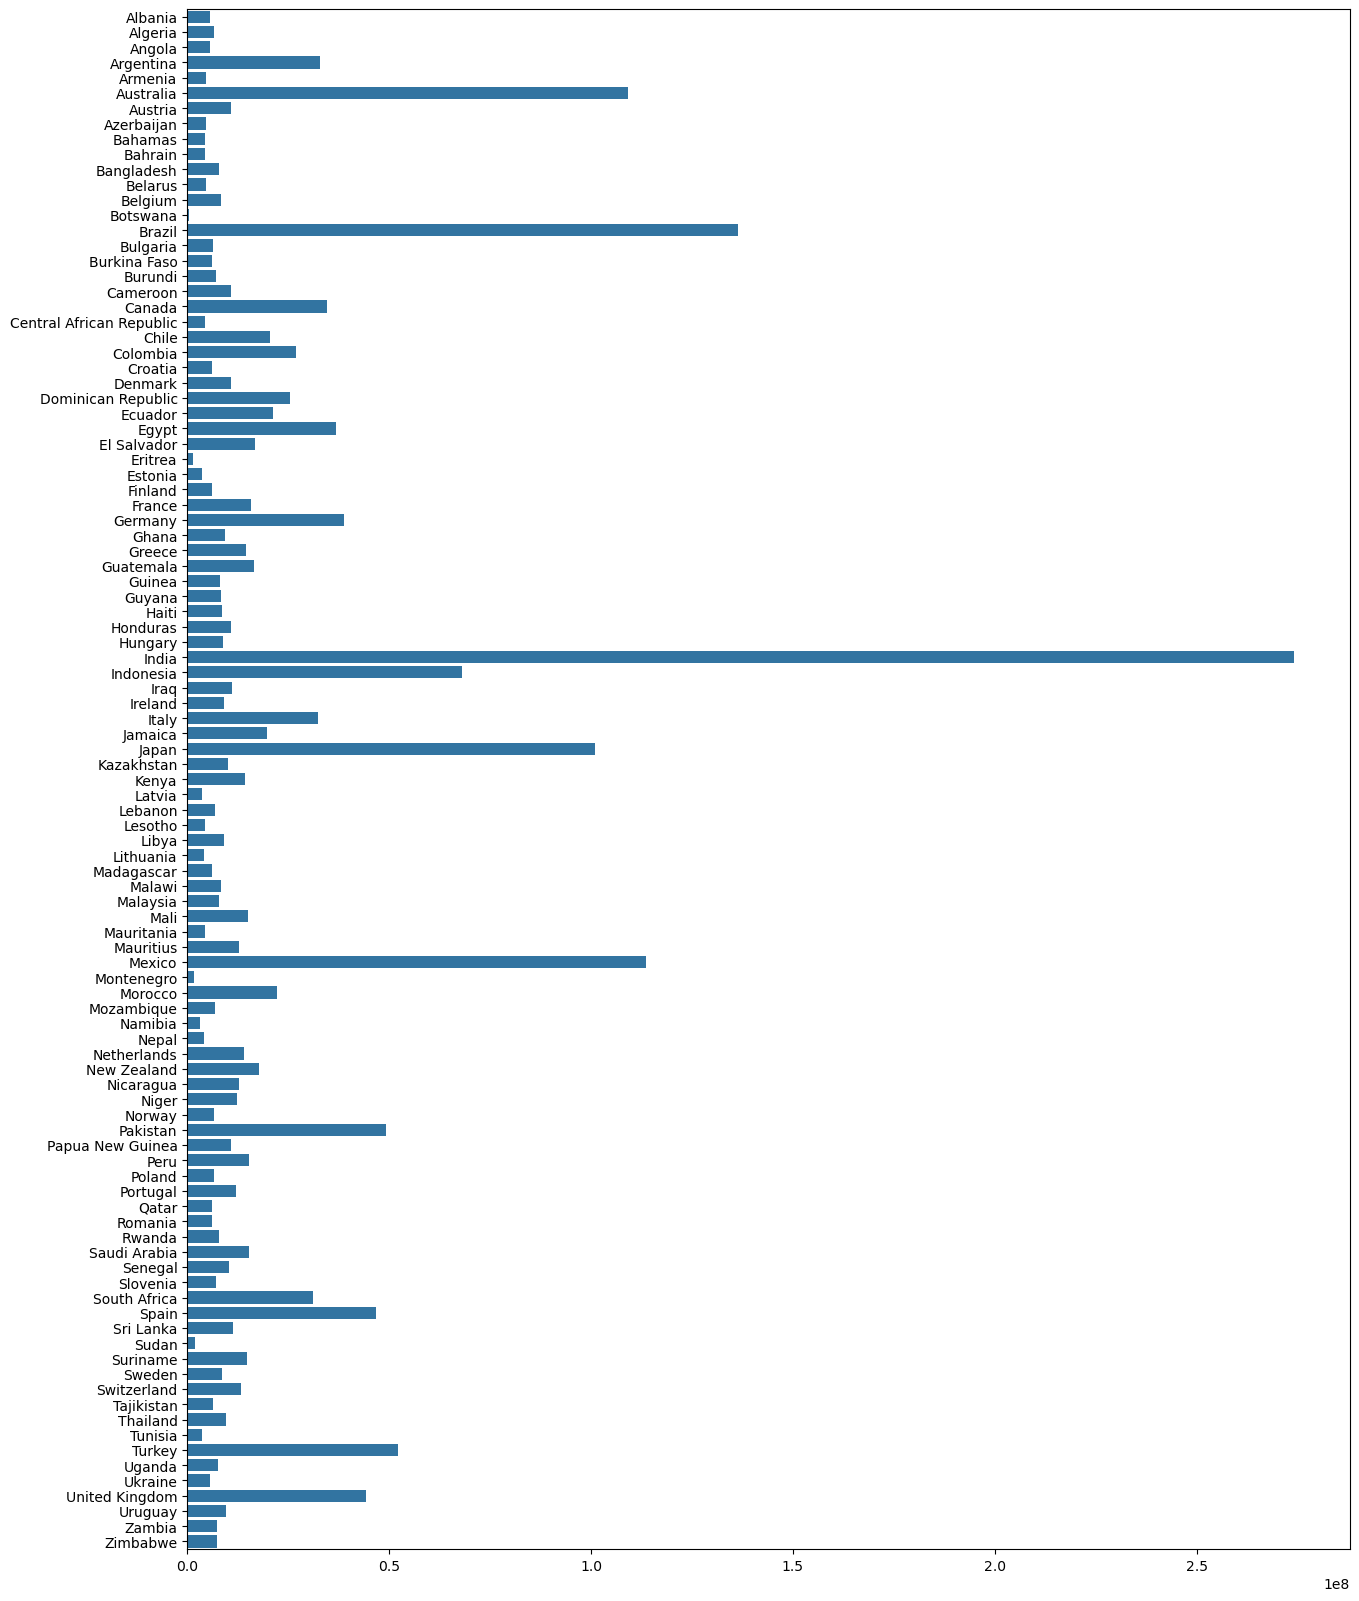

In [26]:
plt.figure(figsize=(15, 20))
sns.barplot(y=country, x=yield_per_country)

<Axes: xlabel='count', ylabel='Item'>

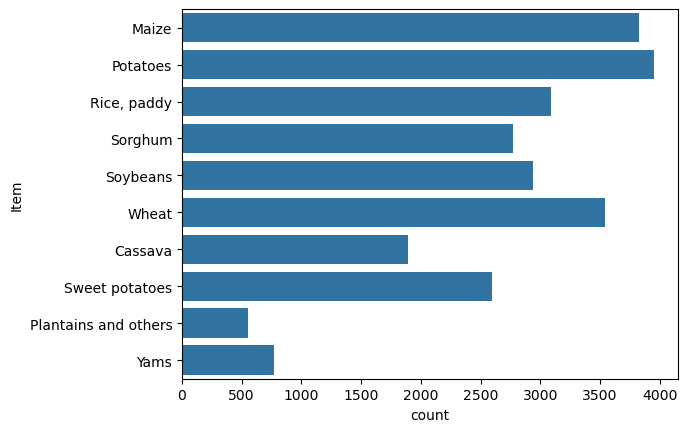

In [28]:
sns.countplot(y=df['Item'])

In [30]:
crops = df['Item'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item']==crop]['hg/ha_yield'].sum())

<Axes: >

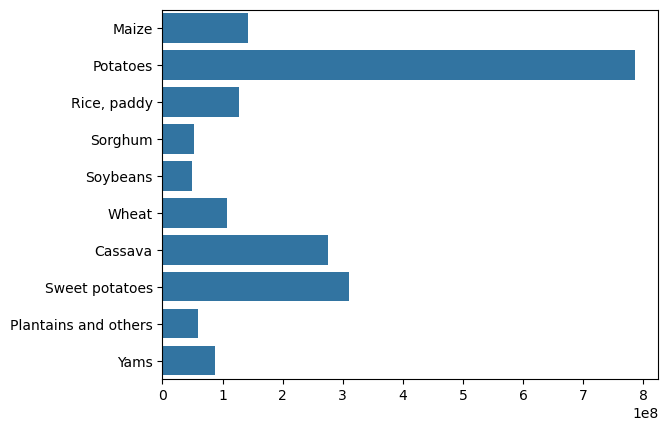

In [31]:
sns.barplot(y=crops,x=yield_per_crop)

# Train Test split Rearranging Columns

In [33]:
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[col]
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [88]:
df.head(3)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613.0
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667.0
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333.0


In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

# Converting Categorical to Numerical and Scaling the values

In [93]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [0, 1, 2, 3]),
            ('OHE', ohe, [4, 5]),
        ],
        remainder='passthrough'
)

In [95]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

In [97]:
preprocesser.get_feature_names_out(col[:-1])

array(['StandardScale__Year',
       'StandardScale__average_rain_fall_mm_per_year',
       'StandardScale__pesticides_tonnes', 'StandardScale__avg_temp',
       'OHE__Area_Algeria', 'OHE__Area_Angola', 'OHE__Area_Argentina',
       'OHE__Area_Armenia', 'OHE__Area_Australia', 'OHE__Area_Austria',
       'OHE__Area_Azerbaijan', 'OHE__Area_Bahamas', 'OHE__Area_Bahrain',
       'OHE__Area_Bangladesh', 'OHE__Area_Belarus', 'OHE__Area_Belgium',
       'OHE__Area_Botswana', 'OHE__Area_Brazil', 'OHE__Area_Bulgaria',
       'OHE__Area_Burkina Faso', 'OHE__Area_Burundi',
       'OHE__Area_Cameroon', 'OHE__Area_Canada',
       'OHE__Area_Central African Republic', 'OHE__Area_Chile',
       'OHE__Area_Colombia', 'OHE__Area_Croatia', 'OHE__Area_Denmark',
       'OHE__Area_Dominican Republic', 'OHE__Area_Ecuador',
       'OHE__Area_Egypt', 'OHE__Area_El Salvador', 'OHE__Area_Eritrea',
       'OHE__Area_Estonia', 'OHE__Area_Finland', 'OHE__Area_France',
       'OHE__Area_Germany', 'OHE__Area_Ghana',

# Let's train our model

In [100]:
#linear regression
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score


models = {
    'lr':LinearRegression(),
    'lss':Lasso(),
    'Rid':Ridge(),
    'Dtr':DecisionTreeRegressor()
}
for name, md in models.items():
    md.fit(X_train_dummy,y_train)
    y_pred = md.predict(X_test_dummy)
    
    print(f"{name} : mae : {mean_absolute_error(y_test,y_pred)} score : {r2_score(y_test,y_pred)}")

lr : mae : 29907.54951246121 score : 0.7473120052095334
lss : mae : 29893.99762450549 score : 0.7473261756207235
Rid : mae : 29864.746356774816 score : 0.747304473910958
Dtr : mae : 3933.4326200115675 score : 0.9797255206814904


# Select model

In [102]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)


array([35286., 22814., 19295., ..., 15011., 34879., 79048.])

# Predictive System

In [105]:
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create an array of the input features
    features = np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]], dtype=object)

    # Transform the features using the preprocessor
    transformed_features = preprocesser.transform(features)

    # Make the prediction
    predicted_yield = dtr.predict(transformed_features).reshape(1, -1)

    return predicted_yield[0]

Year = 1990
average_rain_fall_mm_per_year =1485.0
pesticides_tonnes = 121.00
avg_temp = 16.37                   
Area = 'Albania'
Item = 'Maize'
result = prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)


In [107]:
result

array([36613.])

# Pickle Files

In [110]:
import pickle
pickle.dump(dtr,open('dtr.pkl','wb'))
pickle.dump(preprocesser,open('preprocessor.pkl','wb'))

In [112]:
import sklearn
print(sklearn.__version__)

1.4.2
